In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = "https://finviz.com/screener.ashx?v=111&o=targetprice"
response = requests.get(url)
content = response.content
parser = BeautifulSoup(content, 'html.parser')

# Get the first inner paragraph.
# Find all the paragraph tags with the class inner-text.
# Then, take the first element in that list.
cols = parser.find_all("td", class_="table-top")
data_cols = []
for c in cols:
    data_cols.append(c.text)
print(data_cols)

['No.', 'Ticker', 'Company', 'Sector', 'Industry', 'Country', 'Market Cap', 'P/E', 'Price', 'Change', 'Volume']


In [3]:
table = parser.find_all('table', attrs={'bgcolor': '#d3d3d3' })
print(table[0])

<table bgcolor="#d3d3d3" border="0" cellpadding="3" cellspacing="1" width="100%">
<tr align="center" valign="middle">
<td class="table-top" onclick="window.location='screener.ashx?v=111'" onmouseout="this.className='table-top';" onmouseover="this.className='table-top-h';" style="cursor:pointer;">No.</td>
<td class="table-top" onclick="window.location='screener.ashx?v=111&amp;o=ticker'" onmouseout="this.className='table-top';" onmouseover="this.className='table-top-h';" style="cursor:pointer;">Ticker</td>
<td class="table-top" onclick="window.location='screener.ashx?v=111&amp;o=company'" onmouseout="this.className='table-top';" onmouseover="this.className='table-top-h';" style="cursor:pointer;">Company</td>
<td class="table-top" onclick="window.location='screener.ashx?v=111&amp;o=sector'" onmouseout="this.className='table-top';" onmouseover="this.className='table-top-h';" style="cursor:pointer;">Sector</td>
<td class="table-top" onclick="window.location='screener.ashx?v=111&amp;o=indust

In [4]:
table_rows = table[0].find_all('tr')
print(len(table_rows))


21


In [5]:
multi_array = []
arr = []
for i in range(0,len(table_rows)):
    td = table_rows[i].find_all('td')
    arr.append([])
    for t in td:
        arr[i].append(t.text)
        
print(arr[1:])

[['1', 'RMGN', 'RMG Networks Holding Corporation', 'Services', 'Business Services', 'USA', '13.50M', '-', '1.21', '0.00%', '0'], ['2', 'VNCE', 'Vince Holding Corp.', 'Consumer Goods', 'Textile - Apparel Clothing', 'USA', '186.28M', '-', '15.80', '0.00%', '0'], ['3', 'VRML', 'Vermillion, Inc.', 'Healthcare', 'Diagnostic Substances', 'USA', '69.57M', '-', '0.89', '0.00%', '0'], ['4', 'SSI', 'Stage Stores, Inc.', 'Services', 'Apparel Stores', 'USA', '67.09M', '-', '2.32', '0.00%', '0'], ['5', 'WYY', 'WidePoint Corporation', 'Technology', 'Information Technology Services', 'USA', '45.14M', '-', '0.54', '0.00%', '0'], ['6', 'SDRL', 'Seadrill Limited', 'Basic Materials', 'Oil & Gas Drilling & Exploration', 'Bermuda', '181.69M', '-', '0.31', '0.00%', '0'], ['7', 'LIQT', 'LiqTech International, Inc.', 'Industrial Goods', 'Pollution & Treatment Controls', 'Denmark', '47.83M', '-', '0.75', '0.00%', '0'], ['8', 'EMMS', 'Emmis Communications Corporation', 'Services', 'Broadcasting - Radio', 'USA',

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Only managed to scrape the first page
df = pd.DataFrame(arr[1:],columns=data_cols)
df.head()

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,1,RMGN,RMG Networks Holding Corporation,Services,Business Services,USA,13.50M,-,1.21,0.00%,0
1,2,VNCE,Vince Holding Corp.,Consumer Goods,Textile - Apparel Clothing,USA,186.28M,-,15.80,0.00%,0
2,3,VRML,"Vermillion, Inc.",Healthcare,Diagnostic Substances,USA,69.57M,-,0.89,0.00%,0
3,4,SSI,"Stage Stores, Inc.",Services,Apparel Stores,USA,67.09M,-,2.32,0.00%,0
4,5,WYY,WidePoint Corporation,Technology,Information Technology Services,USA,45.14M,-,0.54,0.00%,0


In [8]:
df.describe()

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
count,20,20,20,20,20,20,20,20,20,20,20
unique,20,20,20,7,15,4,20,5,20,1,1
top,8,NAO,"Vermillion, Inc.",Basic Materials,Biotechnology,USA,64.76M,-,1.16,0.00%,0
freq,1,1,1,6,3,14,1,16,1,20,20


In [9]:
df['Sector'].value_counts()

Basic Materials     6
Services            5
Healthcare          4
Consumer Goods      2
Industrial Goods    1
Financial           1
Technology          1
Name: Sector, dtype: int64

In [10]:
df['Industry'].value_counts()

Biotechnology                       3
Industrial Metals & Minerals        3
Oil & Gas Drilling & Exploration    2
Textile - Apparel Clothing          1
Pollution & Treatment Controls      1
Broadcasting - Radio                1
Business Services                   1
Information Technology Services     1
Property & Casualty Insurance       1
Apparel Stores                      1
Diagnostic Substances               1
Gold                                1
Gaming Activities                   1
Shipping                            1
Electronic Equipment                1
Name: Industry, dtype: int64

In [11]:
df['Country'].value_counts()

USA        14
Canada      3
Bermuda     2
Denmark     1
Name: Country, dtype: int64

In [12]:
df['Price'].dtype
df['Price'] = pd.to_numeric(df['Price'])
df['Price'].dtype

dtype('float64')

In [13]:
#Remove M in Market Cap
def string_replace(_str):
    return _str.replace('M','')
df['Market Cap'] = df['Market Cap'].apply(string_replace)
df['Market Cap'].head()

0     13.50
1    186.28
2     69.57
3     67.09
4     45.14
Name: Market Cap, dtype: object

In [14]:
#Convert Market Cap to Numeric
df['Market Cap'].dtype
df['Market Cap'] = pd.to_numeric(df['Market Cap'])
df['Market Cap'].dtype

dtype('float64')

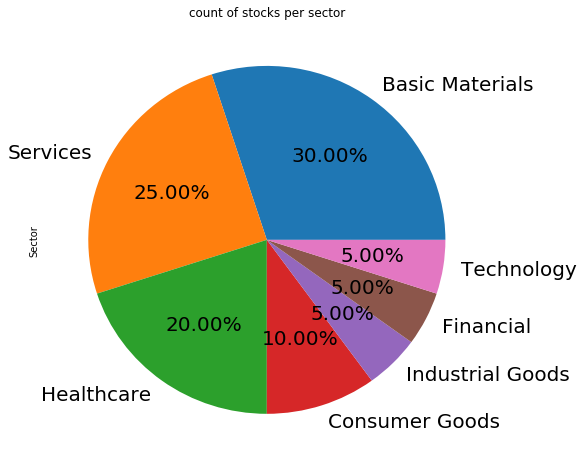

In [15]:
df['Sector'].value_counts().plot(kind='pie',title='count of stocks per sector', autopct='%.2f%%', fontsize=20, figsize=(8, 8))                         



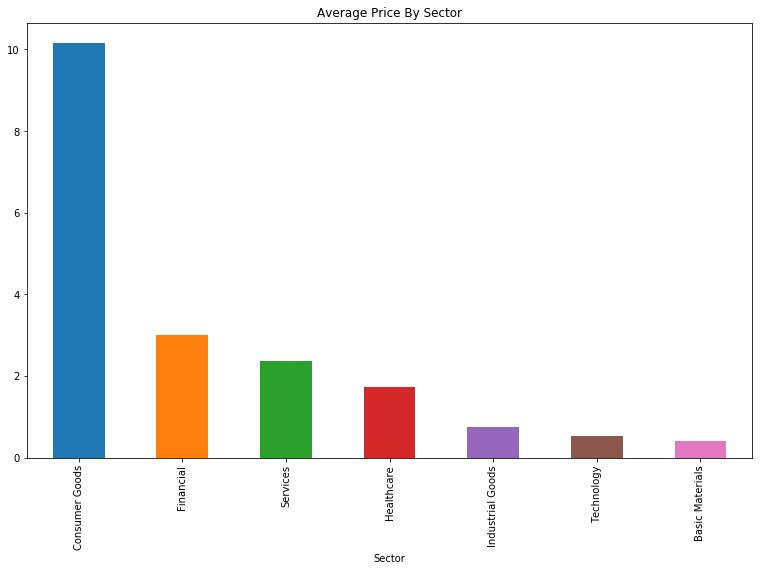

In [16]:
df.groupby('Sector')['Price'].mean().nlargest(20).plot(kind="bar", title="Average Price By Sector",figsize=(13, 8))

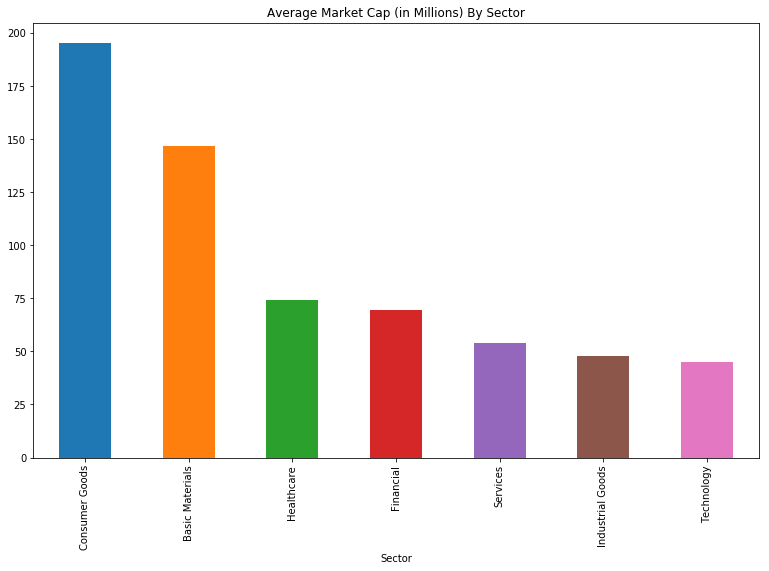

In [17]:
df.groupby('Sector')['Market Cap'].mean().nlargest(20).plot(kind="bar", title="Average Market Cap (in Millions) By Sector",figsize=(13, 8))